<a href="https://colab.research.google.com/github/Buffett111/TESTDCbot/blob/main/Testmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from keras.models import load_model

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#the test.csv file has done the one-hot encoding part.Thanks to my teammate I don't need to preprocess the csv file again
data = pd.read_csv('/content/test.csv')
print(data.shape)
data.head()

(4071, 3)


,imdbId,Genres,local_path
0,114709,[0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],images/114709_.jpg
1,113497,[1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],images/113497_.jpg
2,113277,[1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],images/113277_.jpg
3,114319,[0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],images/114319_.jpg
4,114576,[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0],images/114576_.jpg


In [ ]:
#data preprocessing

img_width = 350
img_height = 350

X = []
#cutting slice of data because I dont have enough RAM
for i in tqdm(range(3000,data.shape[0])):
  path = '/content/drive/MyDrive/'+data['local_path'][i]
  #path='/content/images/102926_.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 1071/1071 [04:05<00:00,  4.36it/s]


In [ ]:
X.shape

(1071, 350, 350, 3)

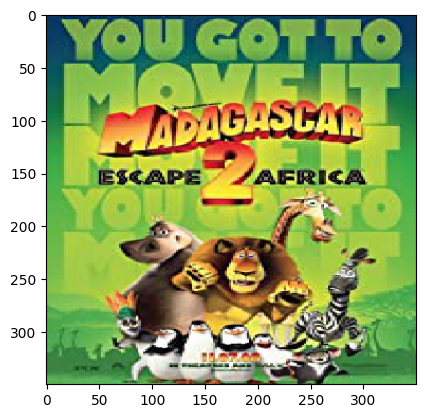

In [ ]:
plt.imshow(X[1])

In [ ]:
# Preserve the next 1500 data
y=data.drop(['imdbId', 'local_path'], axis = 1)
y = y.iloc[3000:]
#y = y.iloc[:1500]
y = y.to_numpy()
print(y.shape)
y[1]

(1071, 1)


array(['[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]'], dtype=object)

In [ ]:
# Split the binary vector string into individual elements

y = np.array([row[0].split() for row in y], dtype=str)
print(y[0])

for row in y:
  row[0] = row[0].strip('[')
  row[-1] = row[-1].strip(']')
y = y.astype('int8')

y= np.insert(y, 15, 0, axis=1) #To meet the format of the IMDB dataset
  
# Print the shape and first row of the resulting array
print(y.shape)
print(y[0])

['[1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '1' '0' '0]']
(1071, 25)
[1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.10)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.55))

model.add(Dense(25, activation='sigmoid'))

#model=load_model('movie_to_genre_train_modelD.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 348, 348, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 174, 174, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 174, 174, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 174, 174, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 174, 174, 32)     1

In [ ]:
model.load_weights('movie_to_genre_TestmodelF.weight')

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
31/31 [==============================] - 193s 6s/step - loss: 0.2496 - accuracy: 0.3001 - val_loss: 0.2411 - val_accuracy: 0.2407
Epoch 2/5
31/31 [==============================] - 214s 7s/step - loss: 0.2499 - accuracy: 0.3011 - val_loss: 0.2417 - val_accuracy: 0.2500
Epoch 3/5
31/31 [==============================] - 188s 6s/step - loss: 0.2482 - accuracy: 0.3022 - val_loss: 0.2400 - val_accuracy: 0.2407
Epoch 4/5
31/31 [==============================] - 191s 6s/step - loss: 0.2457 - accuracy: 0.3188 - val_loss: 0.2412 - val_accuracy: 0.2130
Epoch 5/5
31/31 [==============================] - 197s 6s/step - loss: 0.2484 - accuracy: 0.2991 - val_loss: 0.2383 - val_accuracy: 0.2315


In [ ]:
model.save("movie_to_genre_TestmodelG.h5")
model.save_weights("movie_to_genre_TestmodelG.weight")

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']
1/1 [==============================] - 0s 175ms/step
Comedy 0.56824315
Drama 0.35483393
Crime 0.24970038


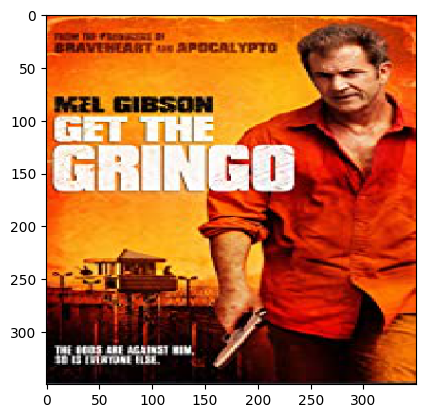

In [ ]:
# Load the model
model = tf.keras.models.load_model("movie_to_genre_TestmodelG.h5")
img_width = 350
img_height = 350


# Load and preprocess the image
img = image.load_img('/content/drive/MyDrive/' + data['local_path'][3500], target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, img_width, img_height, 3)

classes = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']
print(classes)

# Predict the probabilities for each genre
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

# Display the predicted genres and their probabilities
for i in range(3):
    genre = classes[top3[i]]
    probability = y_prob[0][top3[i]]
    print(genre, probability)

